In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airlines = pd.read_csv('Airlines+Data.csv')

In [3]:
airlines.head(10)

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
5,Jun-95,135
6,Jul-95,148
7,Aug-95,148
8,Sep-95,136
9,Oct-95,119


In [4]:
airlines["Month"] = pd.to_datetime(airlines.Month,format="%b-%y")

In [5]:
airlines.head(20)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [6]:
airlines.tail(10)

,Month,Passengers
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [7]:
airlines.shape

(96, 2)

In [8]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


<AxesSubplot:>

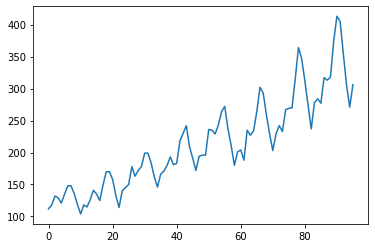

In [10]:
airlines.Passengers.plot()

In [11]:
Train = airlines.head(84)
Test = airlines.tail(12)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

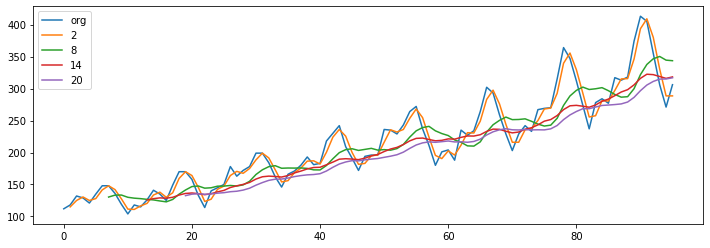

In [13]:
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

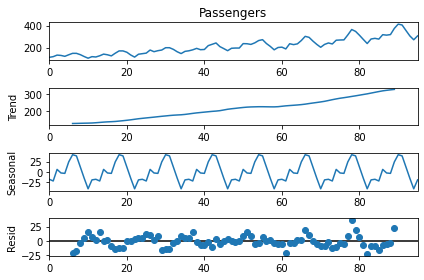

In [14]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots

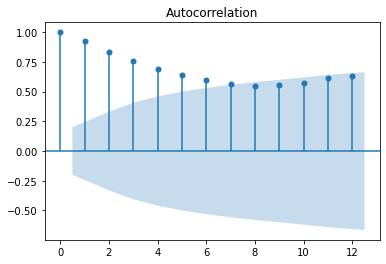

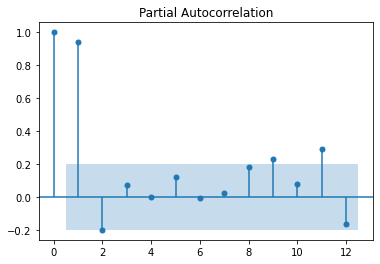

In [16]:
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()

In [17]:
def MAPE(pred,org):
    passengers= np.abs((pred-org)/org)*100
    return np.mean(passengers)

In [18]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

C:\Users\Sagar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


13.411274740513823

In [19]:
hw_model = Holt(airlines["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

<ipython-input-19-367074029609>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(airlines["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


9.843474829332122

In [20]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

2.038562731175214

In [21]:
hwe_model_mul_add = ExponentialSmoothing(airlines["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

1.1863021266536136

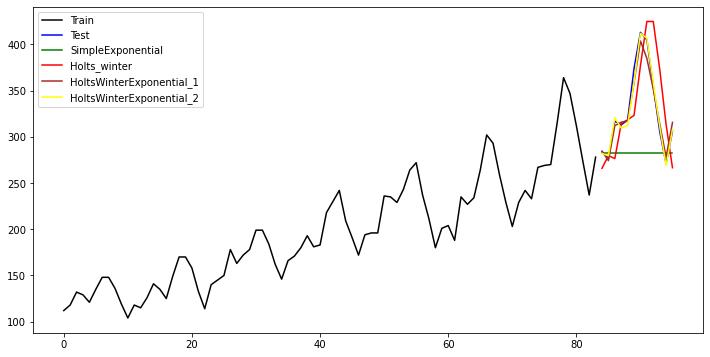

In [22]:
plt.figure(figsize=(12,6))
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

In [24]:
data1 = {"MODEL":pd.Series(["ses_model","hw_model","hwe_model_add_add","hwe_model_mul_add"]),"MAPE_Values":pd.Series([MAPE(pred_ses,Test.Passengers),MAPE(pred_hw,Test.Passengers),MAPE(pred_hwe_add_add,Test.Passengers),MAPE(pred_hwe_mul_add,Test.Passengers)])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['MAPE_Values'])

,MODEL,MAPE_Values
3,hwe_model_mul_add,1.186302
2,hwe_model_add_add,2.038563
1,hw_model,9.843475
0,ses_model,13.411275


In [25]:
hwe_model_mul_add = ExponentialSmoothing(airlines["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

C:\Users\Sagar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [26]:
hwe_model_mul_add.forecast(12)

96     312.899164
97     308.170903
98     355.533272
99     345.770384
100    345.697110
101    392.472018
102    436.501550
103    429.860620
104    380.172862
105    332.318642
106    290.626602
107    330.591802
dtype: float64